- - -
# 프로젝트 : 뉴스 요약봇 만들기

**문장에서 중요한 단어를 파악하는 이론은 쉬워보이지만 막상 해보면 절대 쉽지 않겠죠.**

## 1. 데이터 준비하기
- **데이터 불러오기**
- **데이터 전처리**
- **데이터 분리하기**

## 2. 모델 설계하기

## 3. 모델 학습하기

## 4. 모델 학습 결과

## 5. 추출적 요약
- **추출적 요약 해보기**
- **추상적 요약과 비교하기**

In [ ]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


- - -
### 데이터 준비하기
- **데이터 불러오기**

데이터는 아래 링크에 있는 뉴스 기사 데이터(news_summary_more.csv)를 사용하겠습니다.

[sunnysai12345/News_Summary](https://github.com/sunnysai12345/News_Summary)

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

data.sample(10)

,headlines,text
96716,British national dies while exercising at gym ...,"A 58-year-old British national, Paul Gerrad At..."
61283,Hardik Patel's alleged sex video surfaces online,A video allegedly showing Patidar leader Hardi...
88088,Madonna's adopted son training with Portugal f...,Singer Madonna's adopted son David Banda train...
59865,Woman files molestation case as Twitter user c...,A 32-year-old woman from Mumbai on Monday file...
14011,Marsh brothers dismissed for ducks in same inn...,Australian cricketers Shaun Marsh and Mitchell...
63546,Rahul Gandhi not a 'Pappu' anymore: Union Mini...,Union Minister Ramdas Athawale has said Rahul ...
64736,"'I'm being sacked', Mistry texted wife before ...",Former Tata Chairman Cyrus Mistry had sent a m...
63756,14-yr-old model dies from exhaustion post 13-h...,A 14-year-old Russian model named Vlada Dzyuba...
43244,United flight diverted after dog placed on wro...,A Newark-Missouri United Airlines flight was d...
73075,CJI Dipak Misra once wrote 192-word-sentence i...,"The newly appointed Chief Justice of India, Di..."


`text`가 기사의 본문 데이터, `headlines`가 해당 본문의 요약 데이터인 것 같습니다.

- - -
### 데이터 준비하기
- **데이터 전처리**

In [ ]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


전체 크기는 98401입니다.

In [ ]:
data[data['headlines'].duplicated()]

,headlines,text
3292,Isha Ambani features on February cover of Vogu...,Reliance Industries' Chairman Mukesh Ambani's ...
3293,Indian Oil looking for annual deal to buy crud...,Indian Oil Corporation on Wednesday said it's ...
32850,David Beckham once scored a 60-yard goal from ...,Ex-England football captain David Beckham once...
34227,Sachin once fielded for Pakistan before making...,Sachin Tendulkar once fielded for Pakistan tha...
34518,Iraq launches air strikes against ISIS in Syria,Iraqi forces on Thursday launched air strikes ...
...,...,...
95135,Parveen Babi was 1st Indian film star on TIME ...,Yesteryear actress Parveen Babi was the first ...
95473,Sachin had not let Sehwag watch 2011 World Cup...,Sachin Tendulkar had not let Virender Sehwag w...
95670,How did the tradition of April Fools' Day orig...,"According to one theory, when a change in the ..."
96540,Sachin first opened in ODIs due to Sidhu's 'st...,Sachin Tendulkar came out to open the innings ...


요약 컬럼의 중복을 확인해보니 역시 중복이 있습니다.

In [ ]:
data[data['text'].duplicated()]

,headlines,text
20754,Aegon Life iTerm offers long-term care with en...,Safeguard yourself against life's unpleasant s...
44594,Berger introduces T20 of painting with Express...,Berger Paints has launched Berger Express Pain...
51012,Longest Test innings was longer than 10 footba...,Former Pakistani cricketer Hanif Mohammad batt...
52021,"Aus bowler took hat-trick in his 3rd ODI, neve...",Australia's Anthony Stuart took a hat-trick in...
53578,Lara named daughter after Sydney where he hit ...,Former Windies' captain Brian Lara named his f...
53731,"Captain once dropped himself, replacement brok...",England captain Mike Denness left himself out ...
53865,Bradman once hit 270 at no 7 after reversing b...,Cricket legend Don Bradman reversed the Austra...
53892,Schumacher got kart license aged 12 from anoth...,"German Formula One legend Michael Schumacher, ..."
54078,"Warne gave 150 runs, took only Shastri's wkt o...",Former Australian leg-spinner Shane Warne was ...
55208,Fans once threw pig's head at Madrid player in...,"During an El ClÃÂ¡sico match in 2002, Barcelo..."


요약 데이터보다는 적지만 본문 데이터의 중복도 적지 않게 있습니다.

In [ ]:
data.isna().sum()

headlines    0
text         0
dtype: int64

결측치는 보이지 않습니다.

학습에 방해가 되지 않게 중복 데이터를 모두 제거하겠습니다.

In [ ]:
data = data.drop_duplicates('headlines').drop_duplicates('text')#.dropna() -- 결측치까지 있을 경우

data

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


컬럼이 마침 두 개 뿐이니 중복 제거 코드를 최대한 한 줄로 써봤습니다.

    drop_duplicates 함수에 subset 인자로 두 개의 컬럼을 리스트로 묶어 실행시키면 두 컬럼이 같이 중복인 데이터만 지워지더라구요.
    아마 이것보다 요약된 코드도 존재할 것 같긴 한데 찾진 못했습니다.



In [ ]:
data[data['headlines'].duplicated()]

,headlines,text


In [ ]:
data[data['text'].duplicated()]

,headlines,text


두 컬럼 모두 더 이상 중복인 데이터가 없어졌습니다.

In [ ]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


중복 제거 후 데이터가 *98401*개에서 *98262*개로 약간 줄어들었습니다.

In [ ]:
contractions = { # 정규화 단어 목록
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": " what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  117


`I'm`과 `I am`은 서로 의미가 동일한 같은 단어이지만, 이 둘을 나눠서 토큰화하면 임베딩 단계에서 서로  다른 단어라고 학습할 수 있습니다.

이런 현상을 방지하기 위해 만약 위처럼 단어가 `I'm`이면 `I am`으로 정규화를 해주겠습니다.

> [영단어 정규화 사전 출처](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

In [ ]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

불용어는 `nltk` 모듈에서 가져와줬습니다.

정규화 사전과 불용어 사전 모두 각자 생각하는 단어가 있으면 추가하거나 빼도 무관합니다.(오히려 전처리에 속함)

In [ ]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

문장을 정제해주는 함수입니다.

LMS 예제에서 보여준 함수가 워낙 잘 만들어져 있기도 하고 제가 정규표현식을 아직 잘 몰라서 예제의 함수를 그대로 쓰겠습니다.

In [ ]:
data['headlines'] = data['headlines'].apply(lambda x: preprocess_sentence(x, remove_stopwords=True)) # 헤드라인도 불용어 제거
data['text'] = data['text'].apply(lambda x: preprocess_sentence(x, remove_stopwords=True)) # apply를 써도 오래 걸리는 건 똑같다..

data

,headlines,text
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...
...,...,...
98396,crpf jawan axed death maoists chhattisgarh,crpf jawan tuesday axed death sharp edged weap...
98397,first song sonakshi sinha noor titled uff yeh,uff yeh first song sonakshi sinha starrer upco...
98398,matrix film get reboot reports,according reports new version science fiction ...
98399,snoop dogg aims gun clown dressed trump new video,new music video shows rapper snoop dogg aiming...


대신 LMS 노드에서 진행했을 땐 요약 데이터에는 불용어를 제거하지 않았었는데요.

이번에는 요약 데이터도 불용어를 제거하고 진행해보겠습니다.

    LMS 노드에서 요약 데이터에 불용어를 제거하지 않은 추상적 요약 모델의 결과가 좋지 못했습니다.

In [ ]:
data.replace('', np.nan, inplace=True)

data.isnull().sum()

headlines    0
text         0
dtype: int64

정제를 진행하고 나서 혹시 공백만 남은 데이터가 있는지 확인해봤습니다.

In [ ]:
data = data.drop_duplicates('headlines').drop_duplicates('text')#.dropna() -- 결측치까지 있을 경우

data

,headlines,text
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...
...,...,...
98396,crpf jawan axed death maoists chhattisgarh,crpf jawan tuesday axed death sharp edged weap...
98397,first song sonakshi sinha noor titled uff yeh,uff yeh first song sonakshi sinha starrer upco...
98398,matrix film get reboot reports,according reports new version science fiction ...
98399,snoop dogg aims gun clown dressed trump new video,new music video shows rapper snoop dogg aiming...


결측치는 없었지만 중복이 되었을 확률도 빼먹으면 안되겠죠.

정제한 데이터에 대해 중복을 다시 제거하니 데이터의 개수가 *98262*개에서 *98121*개로 약간 더 줄었습니다.

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09855178809837
요약의 최소 길이 : 1
요약의 최대 길이 : 13
요약의 평균 길이 : 7.136963545010752


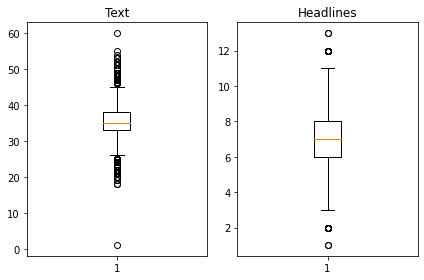

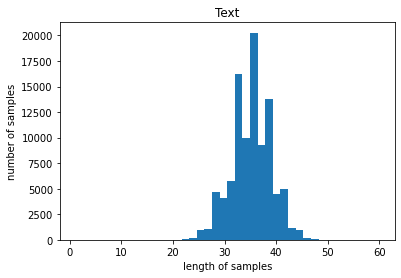

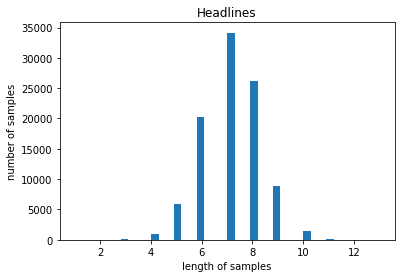

In [ ]:
# 길이 분포 출력

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

문장 데이터의 길이 분포를 시각화를 통해 확인해봤습니다.

In [ ]:
def below_threshold_len(max_len, nested_list, name=''):
    max_len = np.array(max_len)
    max_len_over_count = np.where(max_len > nested_list, 1, 0).sum()
    print('%s 데이터 중 길이가 %d 이하인 데이터의 비율: %.2f'%(name, nested_list, (max_len_over_count/len(max_len))*100))

문장과 임의의 문장 길이를 받으면 문장의 길이를 기준으로 비율을 출력해주는 함수를 만들어봤습니다.

어떻게 하면 코드를 간단하게 쓸까 하다가 이미지를 다룰 때 사용했던 `np.where`을 응용해봤습니다.

In [ ]:
text_max_len = 45
headlines_max_len = 10

below_threshold_len(text_len, text_max_len, '텍스트')
below_threshold_len(headlines_len,  headlines_max_len, '요약')

텍스트 데이터 중 길이가 45 이하인 데이터의 비율: 0.32
요약 데이터 중 길이가 10 이하인 데이터의 비율: 0.22


본문 데이터는 길이를 45로, 요약 데이터는 길이를 10으로 해서 비율을 계산해봤더니

본문 데이터는 0.32, 요약 데이터는 0.22가 나오는군요.

<u>32% 아닙니다. 0.32%입니다.</u>

In [ ]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 97606


문장이 설정해둔 길이 이상인 데이터를 버렸더니 코딱지만큼 떨어져나갔습니다.

*98121* → *97606*

- - -
### 데이터 준비하기
- **데이터 분리하기**

In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')

data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches career ml al ...,upgrad learner switches career ml al salary hi...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food swiggy on...,delhi techie wins free food swiggy one year cr...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken


번역기 모델을 만들었던 것과 마찬가지로 인코더와의 임베딩 공유를 위한 디코더 인풋을 디코더 아웃풋과 함께 준비합니다.

디코더 인풋은 시작 토큰이, 디코더 아웃풋은 종료 토큰이 추가됍니다.

In [ ]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

데이터를 pandas의 데이터 프레임이 아닌 넘파이 array 배열로 바꿔줍니다.

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

print(indices)

[93936 15790 50165 ... 15321 75780 66388]


데이터를 섞어주겠습니다.

위 코드는 데이터를 직접 섞는 것이 아니고 데이터와 레이블이 따로 섞이지 않게 하기 위해

데이터와 크기가 같은 무작위로 섞인 인덱스 배열입니다.

In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

이미 섞인 인덱스를 기준으로 본 데이터를 섞어주면 데이터와 레이블이 따로 섞이는 일이 없습니다.

In [ ]:
n_of_val = 20000

데이터가 총 *97606*개였으니 저는 *20000*개 만큼을 밸리데이션 데이터로 사용하겠습니다.

In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 77606
훈련 레이블의 개수 : 77606
테스트 데이터의 개수 : 20000
테스트 레이블의 개수 : 20000


훈련용 데이터 *77606*개, 테스트용 데이터 *20000*개로 나눠졌습니다.

In [ ]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

# src_tokenizer.word_index -- 빈도 순으로 인덱스화한 단어들을 확인

주석을 풀면 깃허브에서 난리납니다.

In [ ]:
threshold = 8
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69064
등장 빈도가 7번 이하인 희귀 단어의 수 : 48570
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 20494
단어 집합에서 희귀 단어의 비율 : 70.32607436580562
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 3.890899090960561


위 코드는 토크나이저한 단어 사전으로 단어의 등장 횟수가 임의로 설정한 값 이하의 비율을 요약해주는 함수인데요.

새로운 변수를 너무 많이 할당하는 느낌이 들어 좀 더 간략하게 함수로 만들어봤습니다.

In [ ]:
def rare_count_word(tokenizer, threshold):
    total_word = [i for i in tokenizer.word_counts.values()]
    rare_word = [i for i in total_word if i < threshold]
    
    print('단어 집합(vocabulary)의 크기 :', len(total_word))
    print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, len(rare_word)))
    print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(len(total_word) - len(rare_word)))
    print("단어 집합에서 희귀 단어의 비율 :", (len(rare_word) / len(total_word))*100)
    print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (sum(rare_word) / sum(total_word))*100)

rare_count_word(src_tokenizer, 8)

단어 집합(vocabulary)의 크기 : 69064
등장 빈도가 7번 이하인 희귀 단어의 수 : 48570
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 20494
단어 집합에서 희귀 단어의 비율 : 70.32607436580562
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 3.890899090960561


출력 결과가 예제와 같습니다.

대신 `print`를 제외하면 변수가 단 두 개로 줄어들었고,

그 마저도 함수 내에서 생성한 변수라 메모리를 많이 아낄 수 있을 것 같습니다.  
~~이전 프로젝트에서 메모리에 워낙 크게 데여봐서 메모리가 자꾸 신경쓰입니다...~~

In [ ]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 20,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

본문 데이터의 단어 집합의 크기는 *20000*으로 하겠습니다.

In [ ]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[3262, 70, 1, 1588, 4087, 17, 6811, 1787, 50, 2567, 2155, 818, 711, 315, 5281, 5649, 1569, 321, 427, 1, 3262, 183, 711, 705, 2567, 175, 4310, 1654, 221, 1787, 50, 22, 1361, 1013], [610, 2116, 8322, 41, 121, 942, 547, 65, 345, 1, 3475, 292, 2339, 540, 184, 24, 611, 547, 240, 17, 1700, 540, 41, 345, 65, 4641, 1063, 776, 1655], [729, 298, 15204, 433, 122, 5549, 1255, 1734, 71, 7838, 6900, 1106, 1043, 11480, 55, 30, 6900, 341, 1294, 7838, 7839, 1075, 8614, 1915, 39, 33, 2022, 851, 2307, 1634, 590, 341, 1043, 11480, 1386, 67, 19]]


일단 인코더 데이터만 정수인코딩을 해줍니다.

In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

rare_count_word(tar_tokenizer, 6)

단어 집합(vocabulary)의 크기 : 29672
등장 빈도가 5번 이하인 희귀 단어의 수 : 19457
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 10215
단어 집합에서 희귀 단어의 비율 : 65.57360474521434
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 5.892705107898955


이번엔 요약 데이터의 단어 등장 빈도 요약입니다.

등장 빈도가 5번 이하인 단어들을 제외시킬 경우 5.89% 만큼의 단어가 등장하지 않을 것이고,

총 *29672*개의 단어 중 *10215*개의 단어가 남는다고 합니다.

요약 결과를 토대로 요약 데이터의 단어 집합의 크기는 *10000*으로 설정하겠습니다.

In [ ]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input ', decoder_input_train[:5])
print('decoder ', decoder_target_train[:5])

input  [[1, 340, 616, 1773, 1518, 18, 5708], [1, 3985, 55, 964, 5997, 617, 34, 378], [1, 391, 246, 86, 633, 208, 1277], [1, 255, 69, 117, 813, 591, 634], [1, 4381, 368, 19, 8, 1885, 68, 710, 2136]]
decoder  [[340, 616, 1773, 1518, 18, 5708, 2], [3985, 55, 964, 5997, 617, 34, 378, 2], [391, 246, 86, 633, 208, 1277, 2], [255, 69, 117, 813, 591, 634, 2], [4381, 368, 19, 8, 1885, 68, 710, 2136, 2]]


In [ ]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 1
훈련 데이터의 개수 : 77605
훈련 레이블의 개수 : 77605
테스트 데이터의 개수 : 19999
테스트 레이블의 개수 : 19999


여기서 조심하셔야 할 부분이 희귀 단어로만 구성되어 있던 문장은 내용이 모두 지워졌을 수도 있습니다.

특히 디코더의 경우는 내용이 모두 지워졌어도 시작 토큰과 종료 토큰이 있기 때문에 길이는 1일겁니다.

그 점을 유의해서 마지막까지 결측치를 제거해줍니다.

    내용이 모두 지워졌는지는 상대적으로 문장의 길이가 짧은 요약 데이터만 확인해봤지만
    실은 본문 데이터의 내용이 모두 지워젔을 가능성도 존재하긴 합니다.

In [ ]:
#[index for index, sentence in enumerate(encoder_input_train) if len(sentence) == 0] -- 본문 학습 데이터도 모두 무사한가 확인하기
#[index for index, sentence in enumerate(encoder_input_test) if len(sentence) == 0] -- 본문 테스트 데이터도 모두 무사한가 확인하기
# 실행 결과 본문 데이터는 삭제될 데이터가 없었습니다.

In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

패딩을 추가하면서 데이터 준비를 마칩니다.

- - -
### 모델 설계하기

In [ ]:
#from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
#from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


## 인코더 설계 시작
#embedding_dim = 128
#hidden_size = 256

## 인코더
#encoder_inputs = Input(shape=(text_max_len,))

## 인코더의 임베딩 층
#enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

## 인코더의 LSTM 1
## encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
#encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
#encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

## 인코더의 LSTM 2
## encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
#encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
#encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

## 인코더의 LSTM 3
## encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
#encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
#encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

여기서 예제에서는 LSTM 레이어들에 `recurrent_dropout`을 쓰냐 말거냐 라는 뉘앙스로 코드가 작성되있는데요.

LMS에서도 `recurrent_dropout`에 대한 설명이 나와있지만 간략하게 말하자면

일반 `dropout`은 레이어마다 한다면 `recurrent_dropout`는 time step마다 하는 것이라고 합니다. 그럼 dropout이 더 활발하게 일어나겠죠.

쓰게 되면 과적합을 방지할 수 있는 대신 학습에 시간이 오래 걸린다고 하네요.

그래서 둘 다 학습을 진행하고 간단하게 비교해봤습니다.

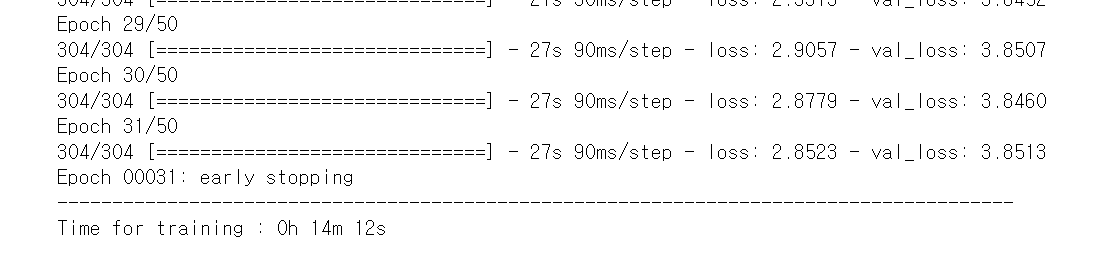

`recurrent_dropout`을 쓰지 않았을 때입니다.

epoch마다 평균 27초가 소요됐고, 조기 종료에 의해 최종 val_loss는 *3.8513*, epoch는 31에서 마무리가 됐습니다.

총 학습 시간은 14분 12초가 경과했구요.

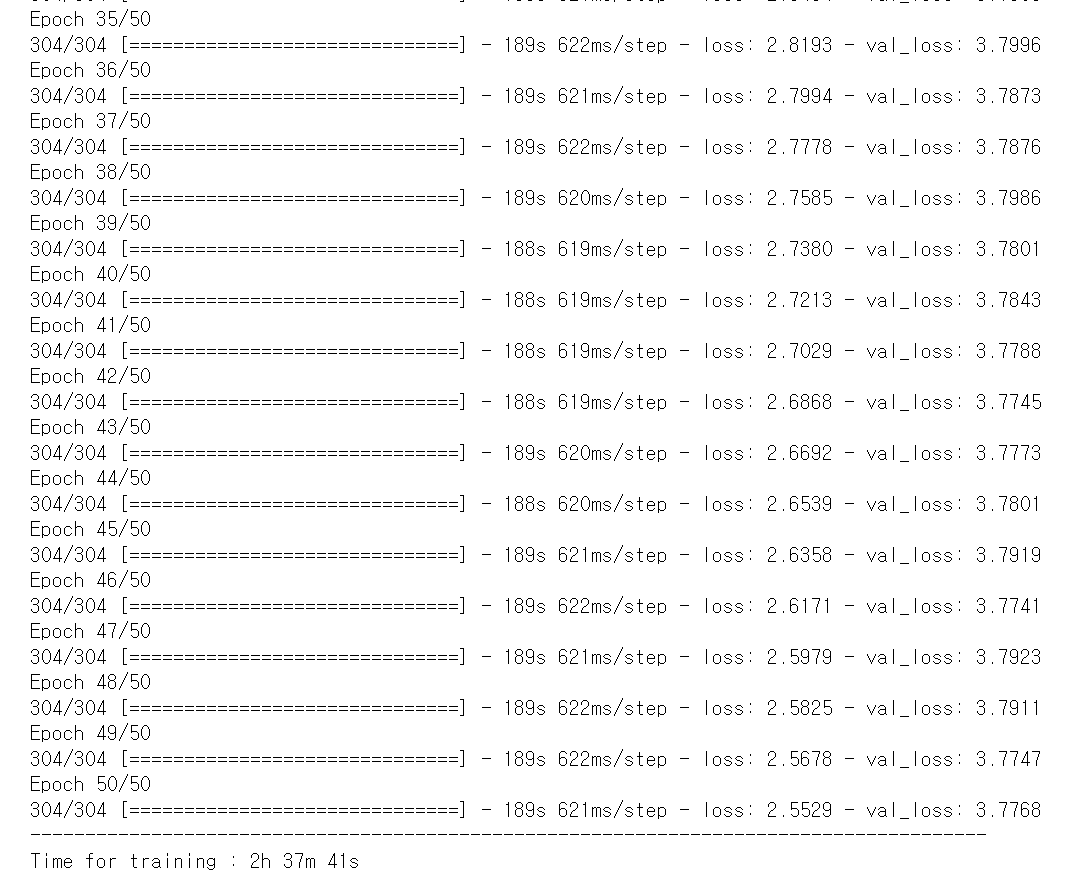

`recurrent_dropout`을 썼을 때입니다.

epoch마다 평균 189초가 소요됐고, 과적합이 줄어드는 대신 학습 자체가 굼떠져서 조기 종료가 일어나지 않았구요.

최종 val_loss는 *3.7768*에서 마무리됐습니다.

학습 시간은 총 2시간 37분 41초가 소요됐습니다.

`recurrent_dropout`를 쓰지 않았을 때와 비교하면 val_loss는 큰 변화가 없는 대신 학습 시간은 2시간이 넘게 더 걸렸습니다.

그럼 학습 결과는 어떨까요.

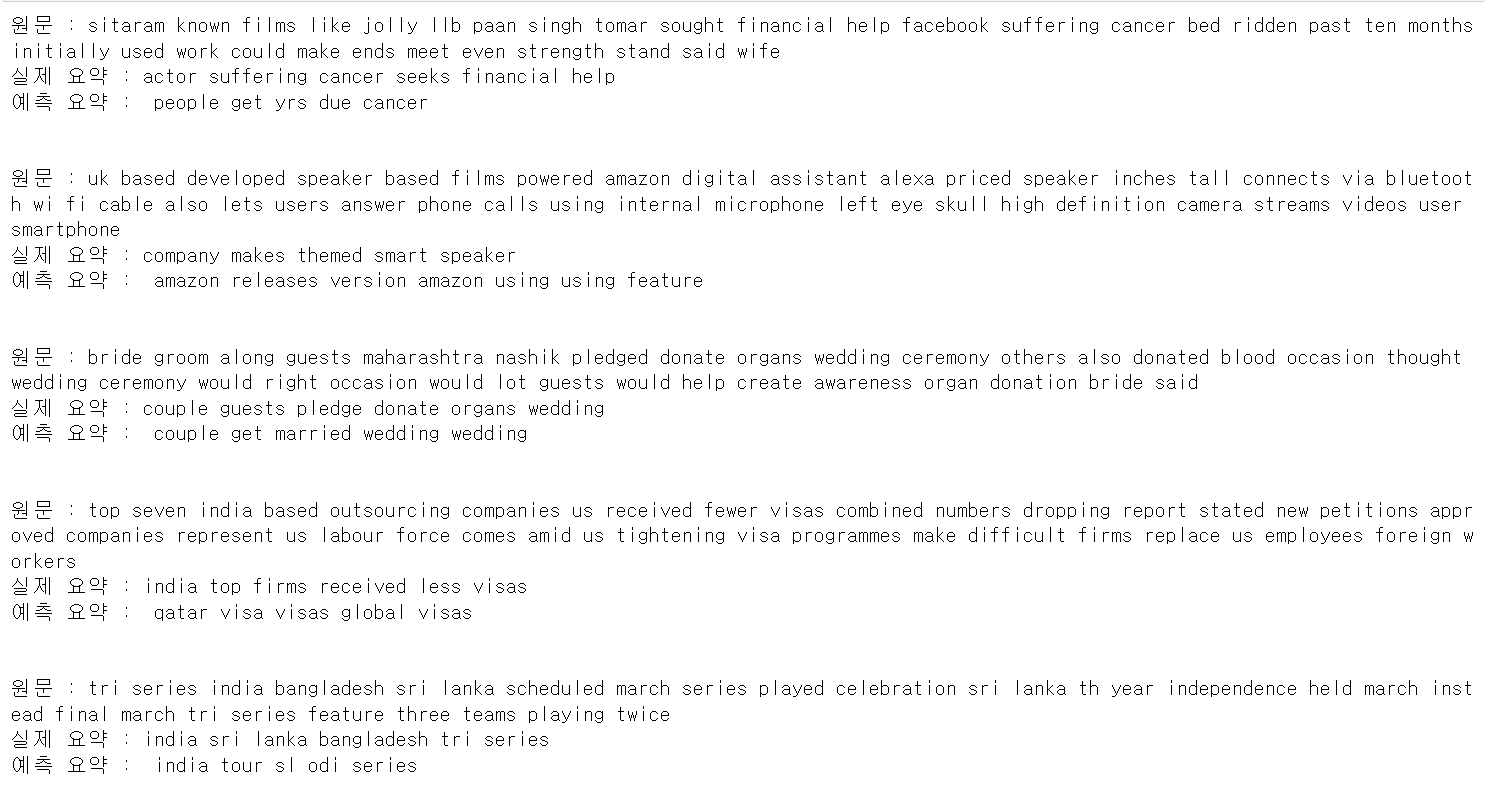

`recurrent_dropout`을 쓰지 않은 모델로 랜덤하게 5개의 문장을 가져와 요약한 결과입니다.

|원문|실제 요약| 예측 요약|
|---|---|---|
|jolly llb pan singh tomar와 같이 알려진 sitaram은 경제적 도움을 구했고 10개월 동안 암으로 고통받고 있는 페이스북을 위해 처음 사용한 일은 심지어 돈을 벌기 위해 노력했다고 아내가 말했다.|암을 앓고 있는 배우는 재정적인 도움을 구한다.|사람들은 암에 걸린다.|
|영국 기반의 개발된 스피커 기반 필름은 파워 아마존 디지털 어시스턴트 알렉사 가격 스피커 인치 높이 블루투스 와이파이를 통해 연결되며 사용자는 내장 마이크 왼쪽 눈 두개골 고화질 카메라 스트림 비디오 사용자 스마트폰을 사용하여 전화에 응답할 수 있다.|회사는 테마의 스마트 스피커를 만든다.|아마존은 기능을 사용하여 아마존 버전을 출시한다.
|신부 신랑과 하객 마하라슈트라시크는 장기 기증 결혼식을 약속했고 다른 사람들도 헌혈을 했다 결혼식이 적절한 기회가 될 것이라고 생각했다. 많은 하객들이 의식 장기 기증 신부가 말했다.|장기기증 결혼식을 맹세하는 커플 하객들|부부가 결혼하다.|
|인도 기반의 아웃소싱 기업 상위 7개사는 더 적은 수의 비자를 받았고, 보고서에는 새로운 탄원서를 승인받은 기업들이 우리의 노동력을 대표한다고 명시되어 있다. 우리가 비자 프로그램을 강화하면서 어려운 기업들이 우리 직원들을 대체하게 되는 가운데.|인도의 상위 기업들은 더 적은 비자를 받았다.|카타르 비자 국제 비자|
|트라이 시리즈 인도 방글라데시 스리랑카 예정된 3월 시리즈는 독립 기념으로 열린 스리랑카 독립 기념행사를 치렀습니다. 3월 시리즈에는 세 팀이 두 번 경기합니다.|인도 스리랑카 방글라데시 트라이 시리즈|인도 투어 슬로디 시리즈|

파파고로 번역한 결과입니다.

파파고가 완벽하게 번역한 것이 아닐 수도 있겠지만, 영문으로 읽어도 요약 솜씨가 형편이 없어보입니다.

`recurrent_dropout`를 사용한 모델도 확인해보겠습니다.

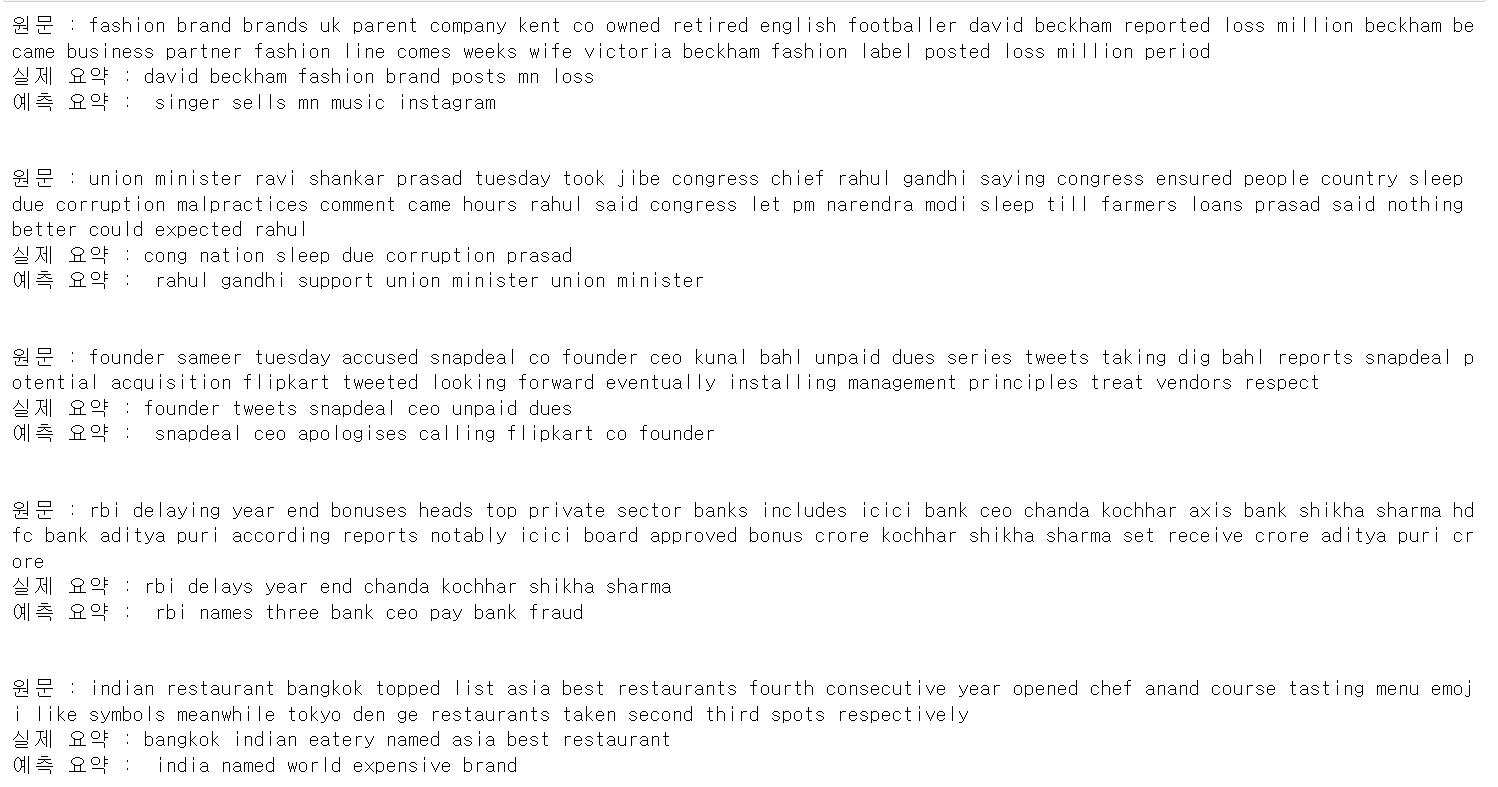

|원문|실제 요약|예측 요약|
|---|---|---|
|패션 브랜드 영국 모기업 켄트 공동 경영자 은퇴한 영국 축구 선수 데이비드 베컴은 손실 백만 베컴이 비즈니스 파트너 패션 라인이 되었다고 보고했습니다. 몇 주 후 아내 빅토리아 베컴 패션 라벨은 손실 백만 기간을 게시했습니다.|데이비드 베컴 패션 브랜드 포스팅 mn loss|가수는 mn 음악 인스타그램을 판다.|
|라비 샹카 프라사드 노조 장관은 화요일 지브 의회 의장인 라훌 간디를 데려와 의회가 부패 부정 관행으로 인해 사람들이 잠을 잘 수 있도록 보장했다고 말했다. 라훌은 의회가 농부들이 프라사드를 빌려줄 때까지 나렌드라모디를 잠들게 했다고 말했다.|부패로 인한 국민 수면 프라사드|라훌 간디는 노조 장관을 지지한다.|
|창업자 사메르는 화요일 스냅딜 공동 창업자 CEO 쿠날 바울 미납 회비 시리즈 트윗을 디지털 바 보고서 스냅딜 잠재적 인수 플립카트가 트위터를 통해 궁극적으로 경영 원칙을 설치할 것을 기대하고 있으며 공급업체를 존중한다고 비난했다.|설립자 트윗 스냅딜 CEO 미납 회비|스냅딜 CEO는 플립카트 공동 설립자에게 전화한 것을 사과한다.|
|rbt 지연되는 연말 보너스 헤드 최고 민간 부문 은행에는 icicici 은행 ceo chanda kochharma hdfc bank adiditya puri가 포함되며 특히 icicici 이사회가 승인한 보너스 crochrecharma set received croadity a purritiori.|타점 지연 연말 찬다 코하르시하 샤르마|rbi 이름 세 은행 CEO 페이 은행 사기.|
|인도 레스토랑 방콕은 아시아 최고의 레스토랑 리스트에서 4년 연속 1위를 차지했고 도쿄 덴지 레스토랑은 각각 2위와 3위를 차지했다.|아시아 최고의 레스토랑으로 불리는 방콕 인도 음식점|세계 고가 브랜드로 명명된 인도|

요약이 더 잘됐다는 느낌도 안들고 무엇보다 2시간을 더 학습한 성과가 보이질 않습니다.

...저는 그냥 드랍아웃만 쓰겠습니다.

In [ ]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/EXPLORATION/dataset/Word2Vec/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)

`recurrent_dropout`를 썼을 때와 안 썼을 때만 비교했을 뿐. 요약 성능은 두 모델 모두 개선이 필요하다고 느꼈고,

저는 모델 개선을 위해 Word2Vec 임베딩을 사용하겠습니다.

In [ ]:
word_vector_dim = 300  # 워드 벡터의 차원수
src_embedding_matrix = np.random.rand(src_vocab, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(1, src_vocab):
    if src_tokenizer.index_word[i] in word2vec:
        src_embedding_matrix[i] = word2vec[src_tokenizer.index_word[i]]

src_embedding_matrix

array([[ 0.25324303,  0.81126186,  0.03713187, ...,  0.0738316 ,
         0.02435048,  0.97099131],
       [-0.00909424, -0.04418945,  0.09960938, ...,  0.14453125,
         0.18066406, -0.08691406],
       [-0.234375  , -0.07177734,  0.01055908, ..., -0.09521484,
        -0.11621094, -0.11230469],
       ...,
       [ 0.17818902,  0.22794421,  0.57577865, ...,  0.62347372,
         0.81331771,  0.59952685],
       [ 0.98982148,  0.73007497,  0.09464276, ...,  0.81554493,
         0.49072243,  0.39265206],
       [ 0.25      ,  0.17285156,  0.21875   , ..., -0.13867188,
         0.11083984,  0.06152344]])

인코더용 임베딩 벡터를 준비합니다.

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import Constant

# 인코더 설계 시작
embedding_dim = 300
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim, 
                     embeddings_initializer=Constant(src_embedding_matrix),  # 카피한 임베딩을 여기서 활용
                     input_length=text_max_len, 
                     trainable=True)(encoder_inputs)

end_masking = Masking(mask_value=0.)(enc_emb)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(end_masking)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

임베딩 레이어만 `embeddings_initializer`를 추가해주면 끝입니다.

그리고 패딩을 사용했으니 마스킹 레이어도 추가해줬습니다.

In [ ]:
tar_embedding_matrix = np.random.rand(tar_vocab, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(3, tar_vocab):
    if tar_tokenizer.index_word[i] in word2vec:
        tar_embedding_matrix[i] = word2vec[tar_tokenizer.index_word[i]]

tar_embedding_matrix

array([[ 0.81435801,  0.058342  ,  0.91991219, ...,  0.65328635,
         0.63084236,  0.56701062],
       [ 0.32722414,  0.55118827,  0.93712519, ...,  0.79137866,
         0.9712721 ,  0.42187086],
       [ 0.88091826,  0.1122778 ,  0.98446387, ...,  0.60551189,
         0.22673917,  0.54996019],
       ...,
       [-0.11669922,  0.04663086,  0.22070312, ...,  0.14648438,
        -0.03149414,  0.265625  ],
       [ 0.05297852, -0.07861328, -0.13183594, ..., -0.10400391,
         0.12304688,  0.17285156],
       [ 0.12890625,  0.18359375,  0.11572266, ..., -0.17675781,
         0.00248718,  0.22265625]])

아직 임베딩이 어떻게 공유되고 흘러가는 지는 모르겠지만

인코더 인풋과 디코더 인풋의 출력층이 서로 다른 것을 보면 디코더용 Word2Vec 임베딩 모델도 따로 써야 하는 게 맞는 것 같아서

디코더용 임베딩 Word2Vec을 준비해줍니다.

In [ ]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim,
                     embeddings_initializer=Constant(tar_embedding_matrix),  # 카피한 임베딩을 여기서 활용
                     input_length=headlines_max_len, 
                     trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
dec_masking = Masking(mask_value=0.)(dec_emb)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_masking, initial_state=[state_h, state_c])

디코더도 마스킹 레이어를 추가해줬습니다.

In [ ]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 300)      6000000     input_1[0][0]                    
__________________________________________________________________________________________________
masking (Masking)               (None, 45, 300)      0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

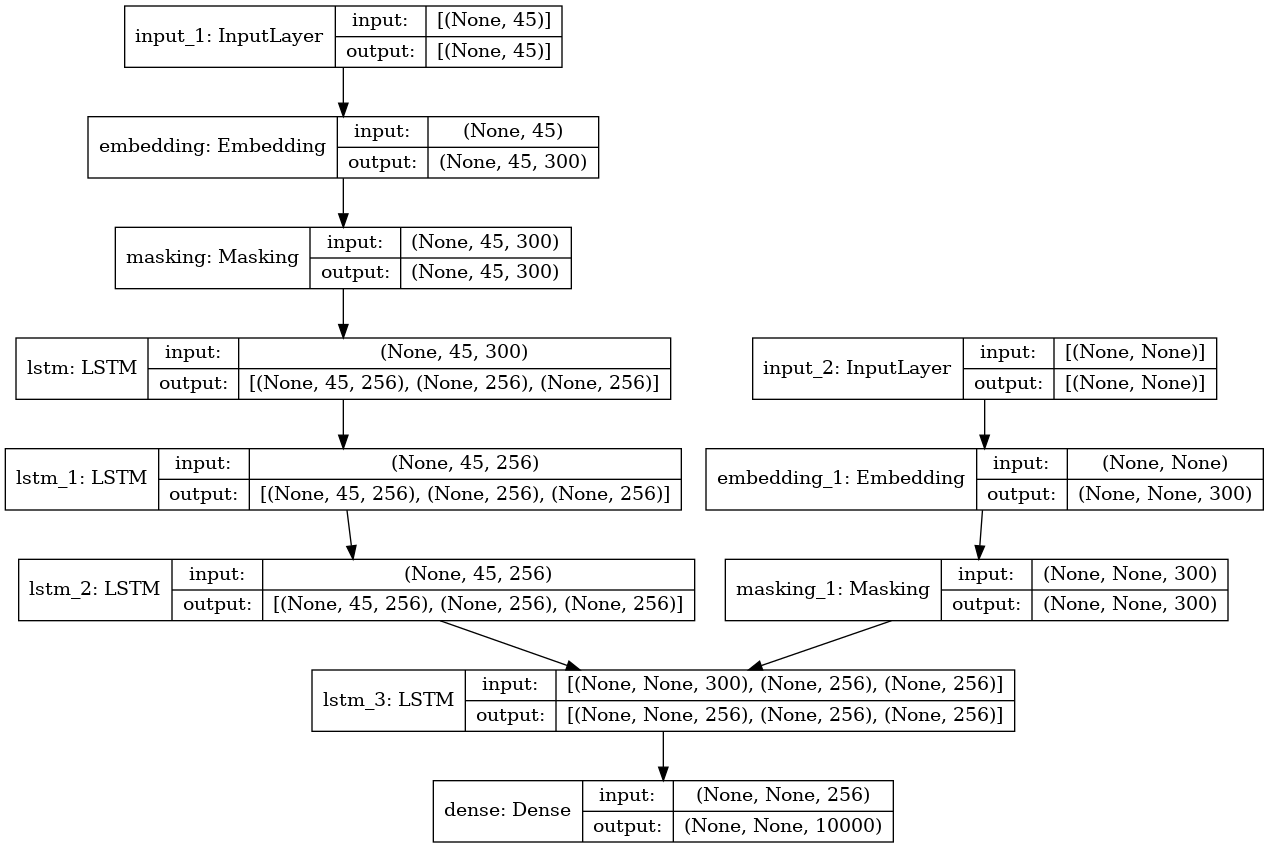

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

이제 레이어 시각화를 빼먹으면 허전할 것 같습니다.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 300)      6000000     input_1[0][0]                    
__________________________________________________________________________________________________
masking (Masking)               (None, 45, 300)      0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

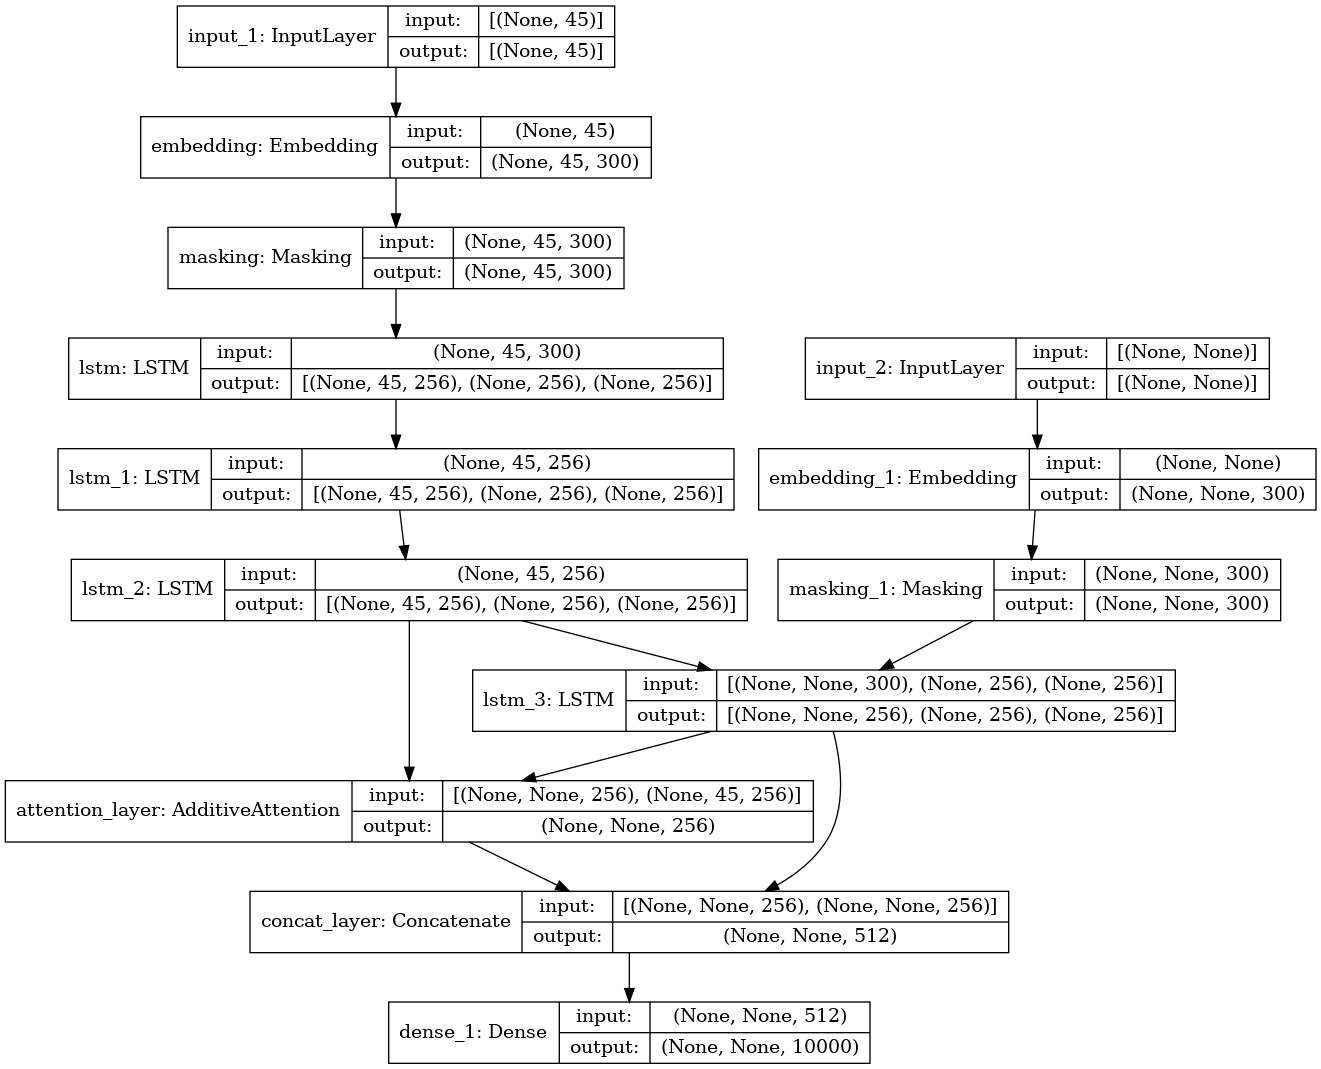

In [ ]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

plot_model(model, show_shapes=True)

이번에 만들 모델은 어텐션 메커니즘을 추가한 모델입니다.

케라스에 준비되어있는 어텐션 라이브러리를 가져와 레이어만 결합해주면 되지만

그것도 저에겐 너무 어려우니 예제의 코드를 그대로 가져와줬습니다.

- - -
### 모델 학습하기

In [ ]:
import time

timestart = time.time()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

print('---------------------------------------------------------------------------------------')

timelaps = time.time() - timestart
print('Time for training : {}h {}m {}s'.format(int(timelaps//3600), int(timelaps%3600//60), int(timelaps%60)))

Epoch 1/50
304/304 [==============================] - 68s 108ms/step - loss: 5.4527 - val_loss: 4.9224
Epoch 2/50
304/304 [==============================] - 29s 96ms/step - loss: 4.7399 - val_loss: 4.5384
Epoch 3/50
304/304 [==============================] - 30s 98ms/step - loss: 4.3667 - val_loss: 4.2731
Epoch 4/50
304/304 [==============================] - 30s 99ms/step - loss: 4.0984 - val_loss: 4.0828
Epoch 5/50
304/304 [==============================] - 30s 100ms/step - loss: 3.8897 - val_loss: 3.9486
Epoch 6/50
304/304 [==============================] - 31s 101ms/step - loss: 3.7142 - val_loss: 3.8616
Epoch 7/50
304/304 [==============================] - 31s 102ms/step - loss: 3.5649 - val_loss: 3.7905
Epoch 8/50
304/304 [==============================] - 31s 103ms/step - loss: 3.4360 - val_loss: 3.7157
Epoch 9/50
304/304 [==============================] - 32s 104ms/step - loss: 3.3160 - val_loss: 3.6660
Epoch 10/50
304/304 [==============================] - 32s 104ms/step - loss

얼리스탑핑 `patience`를 5를 주고 학습을 진행해봤습니다.

    이전에 얼리스탑핑을 사용할 때 patience 인자가 얼리스탑핑을 적용할 최소 epochs를 말하는 것일 줄 알았는데,
    알고보니 설정한 값 만큼 계속 학습에 진전이 없으면 학습을 멈추겠다는 기능이더라구요.
    전 그것도 모르고 patience를 15만큼 주고 '이거 왜 이렇게 안 멈추지?' 했던 기억이 있습니다.

- - -
### 모델 학습 결과

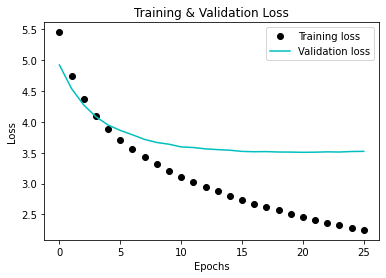

In [ ]:
plt.plot(history.history['loss'], 'ko', label='Training loss')
plt.plot(history.history['val_loss'], 'c', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

민트초코와 오레오 그래프도 아니면 섭섭할 것 같습니다.

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

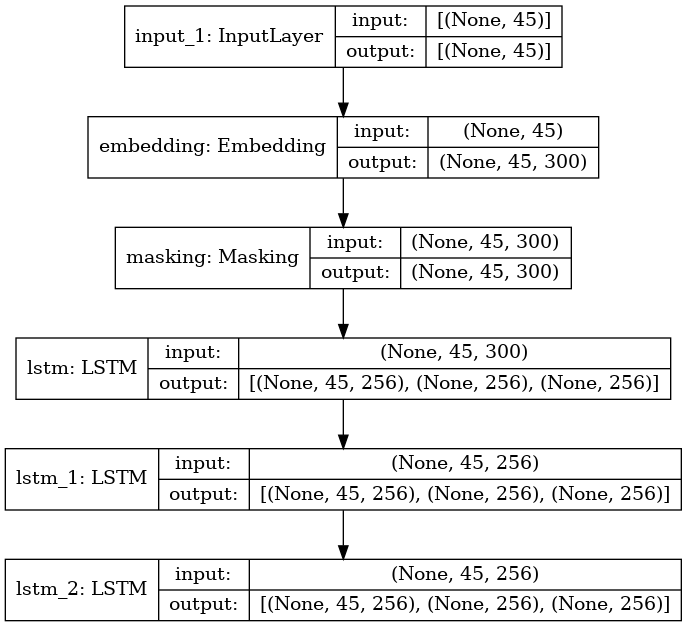

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

plot_model(encoder_model, show_shapes=True)

In [ ]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

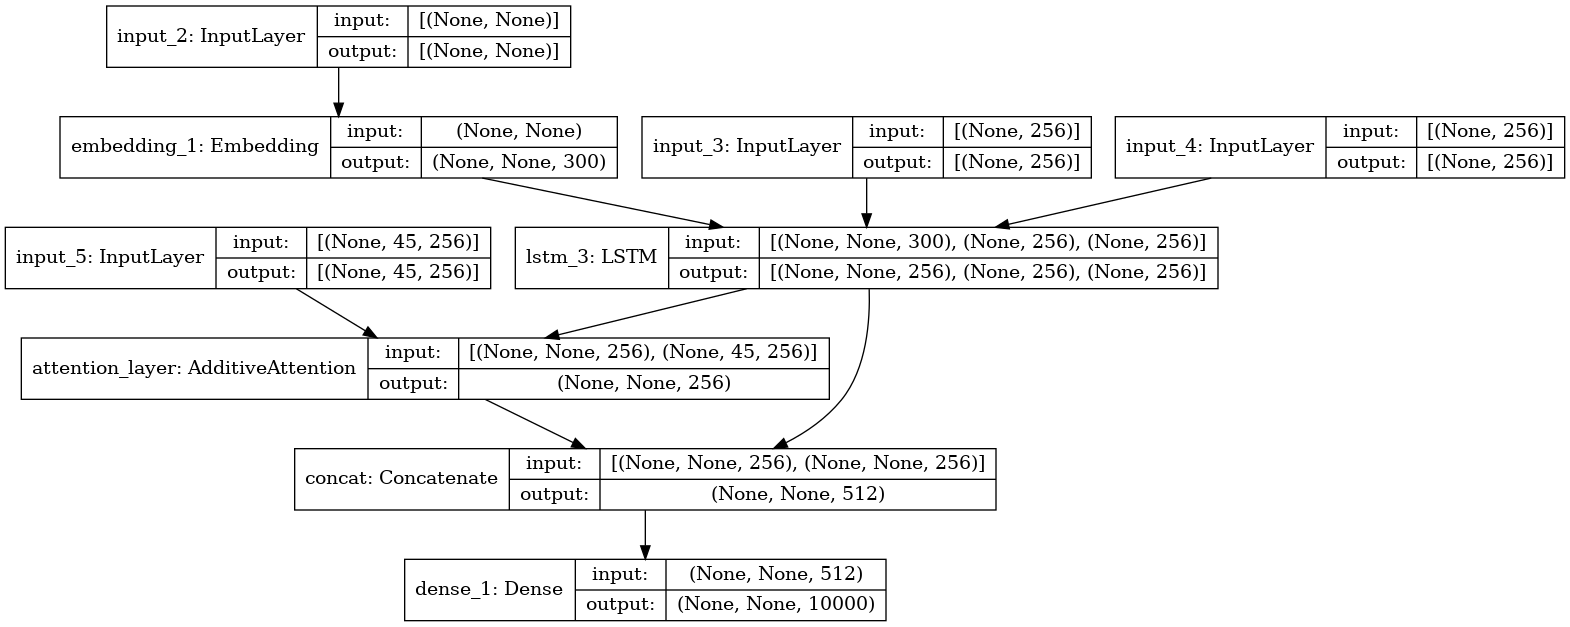

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

plot_model(decoder_model, show_shapes=True)

어텐션 레이어가 마지막 레이어가 되는군요.

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [ ]:
import random

for i in range(5):
    seq_index = random.randint(0, len(encoder_input_test))
    print("원문 :", seq2text(encoder_input_test[seq_index]))
    print("실제 요약 :", seq2summary(decoder_input_test[seq_index]))
    print("예측 요약 :", decode_sequence(encoder_input_test[seq_index].reshape(1, text_max_len)))
    print("\n")

원문 : us defence secretary james mattis criticised pentagon officials spending crore taxpayer money private label uniforms soldiers afghan national army citing report found uniforms ineffective urging pentagon learn mistake mattis said expect organisations take steps end waste department 
실제 요약 : pentagon slammed wasting cr afghan army uniforms 
예측 요약 :  us defence secy crore military arms


원문 : talking articles written son taimur ali khan saif ali khan said enjoy sometimes like making gods children added promotions ends asked taimur wife kareena work energy questions saif said 
실제 요약 : like make gods kids saif taimur 
예측 요약 :  sara kids taimur saif


원문 : japan softbank led team investors offered buy shares cab aggregating startup uber less current value according reports softbank offer value uber billion compared recent valuation billion deal goes softbank led coalition would buy least uber shares existing investors 
실제 요약 : softbank offers buy uber shares discount report 
예측 요약 :  s

Word2Vec을 사용하고 마스킹 레이어를 추가한 모델의 요약 결과입니다.

|원문|실제 요약|예측 요약|
|---|---|---|
|제임스 매티스 미 국방장관은 국방부 관리들이 악랄한 납세자 돈을 쓰는 사설 라벨 군복 군인들 아프간 국민군을 비난했습니다. 보고서는 제복이 효과적이지 않다는 것을 발견하여 펜타곤 학습 실수를 촉구하는 매티스 장관은 조직이 폐기물 부서를 보내는 조치를 취할 것으로 기대한다고 말했습니다.|펜타곤은 군복을 낭비하고 있다.|우리 국방의 비밀 군사 무기.|
|타이무랄리 칸 사이팔리 칸은 타이무르 아내 카레나에게 일 에너지 질문을 던지며 타이무르 칸이 말했다.|마치 신들을 아이들 사이프 타이무르처럼.|사라 키즈 타이무르 사이프|
|소프트뱅크 주도 팀 투자자들은 소프트뱅크 오퍼 가치 uber 10억 달러 대비 최근 평가액 uber 10억 달러 거래 소프트뱅크 주도 연합이 기존 투자자들을 가장 적게 매수할 것이라는 보도에 따르면 스타트업 uber-aggregate의 주식을 매입할 것을 제안했다.|소프트뱅크, 우버 주식 할인 보고서 구매 제안|소프트뱅크는 uber 억의 지분을 매입한다.|
|경찰은 화요일 화가 난 말다툼을 한 남자가 두 아이를 던졌다고 말했다. 이웃들이 인근 병원 3명을 데려갔다. 경찰은 아이들이 위험하다고 말했다. 경찰은 경찰이 위험하다고 말했다.|하리아나 남자는 아이들에게 불 점프를 강요한다.|뇌물을 받고 병이 나다.|
|안전 경고 이메일 연합 항공사들은 토요일 직원들에게 조종실 출입 정보 때문에 공공 보안 코드가 훼손될 수 있다고 경고했습니다. 연합 대변인은 해킹이 연방 항공 행정부에 기밀 정보를 공유하도록 통보했다고 말했습니다. 누구라도 허가받지 않은 금지 연합된 직원들에게 주의를 환기시키는 것을 금지했습니다.|연합 항공사들은 조종실 코드가 유출될 수 있다고 경고한다.|항공사는 데이터 해킹 주장을 부인한다.|

파파고 번역 결과입니다.

제가 봤을 땐 준비된 실제 요약과는 거리가 좀 있어도 일부 결과는 원문을 읽어보면 '아 저렇게 요약을 할 수도 있겠다' 싶은 정도로는 요약을 했습니다.

요약 결과를 조금만 더 확인해보겠습니다.

In [ ]:
for i in range(5):
    seq_index = random.randint(0, len(encoder_input_test))
    print("원문 :", seq2text(encoder_input_test[seq_index]))
    print("실제 요약 :", seq2summary(decoder_input_test[seq_index]))
    print("예측 요약 :", decode_sequence(encoder_input_test[seq_index].reshape(1, text_max_len)))
    print("\n")

원문 : female dentist arrested allegedly beating torturing year old domestic help delhi kalyan vihar girl bitten face burnt electric iron attacked scissors delhi commission women said girl rescued neighbour alerted authorities admitted hospital treatment 
실제 요약 : delhi doctor arrested torturing yr old domestic help 
예측 요약 :  woman arrested raping minor girl delhi


원문 : year old woman allegedly gangraped four men andhra pradesh guntur district taken room pretext offered job given drinks laced sedatives told police incident occurred march lodging complaint pictures appeared online recently 
실제 요약 : woman allegedly gangraped men andhra pradesh 
예측 요약 :  woman gangraped men gangraped andhra pradesh


원문 : year old washroom attendant working restaurant delhi connaught place arrested allegedly trying make video female customer washroom tried make video hole woman alleged informed police requested ensure video circulated 
실제 요약 : staffer held making woman video delhi eatery washroom 
예측 요약 :  

|원문|실제 요약|예측 요약|
|---|---|---|
|여성 치과의사는 고문으로 체포된 것으로 알려진 1년 된 가정 도우미 델리 칼리얀 비하르 소녀 물린 얼굴 전기 다리미 공격 가위 델리 위원회 여성들은 구조된 이웃 소녀가 병원에 입원했다고 당국에 경고했습니다.|델리 의사는 당신의 오래된 가정부 고문을 체포했다.|미성년자 소녀 델리를 강간하다 체포된 여성|
|1년 된 여성이 네 명의 남자를 집단 강간한 것으로 알려졌으며 라프라데시 군투르 구역은 최근 경찰 사건이 일어났다고 진술한 진정제 음료가 제공된 방을 핑계로 3월 숙박 불만 사진이 온라인에 게시되었습니다.|남성들과 프라데시들을 집단 강간한 것으로 알려진 여성|여성 갱단 강간범 남자 갱스터와 프라데시.|
|일 년 된 화장실 종업원이 일하는 식당 델리는 체포된 것으로 알려진 여성 고객 화장실을 비디오 구멍으로 만들려고 시도한 것으로 알려진 여성이 경찰이 비디오가 유포되도록 요청했습니다.|직원이 여성 비디오 델리 식당 화장실을 만드는 일을 했다.|델리 남자는 옷을 입은 여성을 성추행한 혐의로 체포했다.|
|개그맨 크루슈나 아비셰크 공유 사진 인스타그램 스포츠 대머리 코미디 쇼 드라마 회사 가가르쥬가드디야 그림 쇼와 함께 다양한 외모의 캡션을 시도해야 합니다. 또한 개그맨 수간다 미쉬라일리어스가 다른 사람들 사이에서 특징입니다.|크루슈나 아비셰크는 대머리 코미디 쇼를 공유한다.|mallika 공유 사진쇼는 다음과 같다.|
|도널드 트럼프 미국 대통령은 화요일 디왈리 대통령 집무실을 축하하며 인도계 미국인 힌두교 미국인 진정으로 사랑받는 위대한 미국인 가족은 강력한 관계를 매우 가치 있게 여긴다고 말했다.|도널드 트럼프는 디왈리 사무실을 축하한다.|도널드 트럼프는 인도 디왈리를 축하한다.|

~~기사 주제 왜이래 ㅋㅋㅋ~~

적어도 드랍아웃만 썼던 모델과는 유의미한 성능 개선이 있다고 보고 있는데, 여러분의 생각은 어떠신가요?

    실제 요약도 뭔가 이상한 느낌이 드는 데 번역 문제일까요..

- - -
### 추출적 요약
- **추출적 요약 해보기**

In [ ]:
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

data

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


`Summa`를 이용한 추출적 요약을 확인하기 위해 정제되지 않은 데이터를 다시 불러와줍니다.

In [ ]:
from summa.summarizer import summarize

summarize(data['text'][0], ratio=0.4)

"upGrad's Online Power Learning has powered 3 lakh+ careers."

`Summna`의 `summarize`를 이용해 아주 간단하게 추출적 요약을 하는 방법입니다.

제가 만든 모델과 비교해 추출적 모델과 추상적 요약의 차이를 확인해보겠습니다.

- - -
### 추출적 요약
- **추상적 요약과 비교하기**

In [ ]:
def Abstractive_summary(sentence):
    sentence = preprocess_sentence(sentence, remove_stopwords=True) # 정규화, 불용어 제거
    sentence = [src_tokenizer.word_index[word] for word in sentence.split() \
                if word in src_tokenizer.word_index if src_tokenizer.word_index[word] < 20000] # 정수 인코딩
    sentence = sentence + [0 for i in range(text_max_len - len(sentence))] # 길이 45에 맞게 패딩
    sentence = np.array(sentence).astype('int32')
    
    return decode_sequence(sentence.reshape(1, text_max_len))

Abstractive_summary(data['text'][0])

' upgrad upgrad ai career hike'

데이터의 한 문장씩 받아 정제한 후에 추상적 예측 모델에 집어넣은 결과를 반환해주는 함수입니다.

In [ ]:
for i in range(10):
    i = random.choice(data.index)
    text = data['text'][i]
    summary = data['headlines'][i]
    print("원문 :", text)
    print("실제 요약 :", summary)
    print("추상적 요약 :", Abstractive_summary(text))
    print("추출적 요약 :", summarize(text, ratio=0.45))
    print("\n")

원문 : Maria Jones-Elliot from Ireland gave birth to twins Amy Ann and Kate Marie Elliot 87 days apart, making them the twins with the longest interval between their births, according to Guinness. Amy was born prematurely on June 1, 2012, while Kate was born on August 27. The exact interval between their birth is 87 days, 1 hour and 45 minutes.
실제 요약 : The longest duration between birth of twins is 87 days
추상적 요약 :  twins birth twins twins
추출적 요약 : Maria Jones-Elliot from Ireland gave birth to twins Amy Ann and Kate Marie Elliot 87 days apart, making them the twins with the longest interval between their births, according to Guinness.


원문 : As many as 16 mass graves from Indonesia's mass killings of alleged communists were found, an organisation investigating the 1965-66 massacre has claimed. The organisation said that the graves, discovered on Java island, could contain around 5,000 bodies. At least 5 lakh alleged communists were killed in Indonesia in 1965-66 following a failed coup a

랜덤으로 10개의 결과를 비교해봤습니다.

|원문|실제 요약|추상적 요약|추출적 요약|
|---|---|---|---|
|기네스에 따르면 아일랜드 출신의 마리아 존스 엘리엇은 쌍둥이 에이미 앤과 케이트 마리 엘리엇을 87일 간격으로 낳아 출생 간격이 가장 긴 쌍둥이로 만들었다. 에이미는 2012년 6월 1일에, 케이트는 8월 27일에 태어났다. 이들의 정확한 출생 간격은 87일 1시간 45분이다.|쌍둥이의 출생은 87일이다.|쌍둥이로 태어난 쌍둥이|기네스에 따르면 아일랜드 출신의 마리아 존스 엘리엇은 쌍둥이 에이미 앤과 케이트 마리 엘리엇을 87일 간격으로 낳아 출생 간격이 가장 긴 쌍둥이로 만들었다.|
|1965-66년 인도네시아에서 공산주의자로 추정되는 사람들을 대량 학살한 것으로 추정되는 집단 무덤이 16개나 발견됐다고 한 단체가 주장했다. 국제앰네스티는 자바섬에서 발견된 무덤에는 약 5,000구의 시신이 매장될 수 있다고 밝혔다. 1965년부터 1966년까지 인도네시아에서 적어도 5 라흐의 공산주의자로 추정되는 사람들이 인도네시아 공산당의 쿠데타 시도 실패 후 살해되었다.|인도네시아 반공 숙청 집단 무덤 발견|집단 묘지 발견 집단 묘지 발견|1965-66년 인도네시아에서 공산주의자로 추정되는 사람들을 대량 학살한 것으로 추정되는 집단 무덤이 16개나 발견됐다고 한 단체가 주장했다.|
|ICC는 추첨된 재스 경기 후 '불량' 판정을 받은 지 1년 만에 3차 인도-호주 테스트를 개최한 멜버른 피치를 '평균'으로 평가했다. '평균 미만' 등급은 1점, '불량' 등급은 3점입니다. 5년 동안 5개의 감점이 있는 투구는 국제적인 지위를 잃는다.|호주-인도 복싱 데이 테스트에 사용된 MCG 피치 '평균' 등급|인도 최고 등급 시험 평균을 구하다|'평균 미만' 등급은 1점, '불량' 등급은 3점입니다.|
|선라이저스 하이데라바드가 일요일 구자라트 라이온스를 9명의 위켓으로 꺾은 후 2017년 IPL에서 2연패했다. 먼저 타구를 친 구자라트 라이온스는 제이슨 로이, 다이네쉬 카르틱, 드웨인 스미스에 의해 30개와 함께 135/7을 기록했다. 이에 대해 데이비드 워너의 45구 76*과 모이즈 헨리케스의 39구 52*는 선라이저스가 27구를 남겨두고 목표물을 추격하는 데 도움을 줬다.|선라이저 하이데라바드가 구자라트 라이온스를 9개의 위켓으로 물리쳤다.|srh 패배 글라이켓 윈글|선라이저스 하이데라바드가 일요일 구자라트 라이온스를 9명의 위켓으로 꺾은 후 2017년 IPL에서 2연패했다.|
|뭄바이 고등법원은 63세의 살인죄수가 형량을 초과해 3년 9개월 동안 불법 구금된 것에 대해 2라흐의 배상금을 지급했다. 법관은 정부가 45일 이내에 그에게 돈을 지불하도록 지시했지만, 연 12%의 이자를 부과하지 못했다.|죄수는 3년 이상의 징역에 대해 2라흐의 보상을 받는다.|징역형을 선고받은 죄수들||
|대법원은 수요일 아드하르가 기존과 신규 모두 모바일 연결과 은행 계좌에 필요하지 않다고 판결했다. 아다하르는 또한 학교 입학 및 UGC, NEET, CBSE 시험에 의무적이지 않다고 최고 법원은 말했다. 그리고 민간 기관은 고객에게 아다하르를 요구할 수 없다고 덧붙였다. 그러나 Adhaar-PAN 연계는 의무적이며 소득세 신고서를 제출하는 데 필요하다고 판결했다.|대법원 판결 이후 아드하르가 필요하지 않은 서비스는?|아다하 링크 데드라인 sc를 연결하는 아다하.|대법원은 수요일 아드하르가 기존과 신규 모두 모바일 연결과 은행 계좌에 필요하지 않다고 판결했다.|
|인도의 모든 소매 결제 시스템을 위한 종합 조직인 인도 국립 결제 회사는 7월에 10억 개의 월간 거래량을 달성했습니다. NPCI 상무는 "모바일 결제와 아다하르 기반 결제에서 가장 높은 성장세를 보였다"고 말했다. 그들의 다음 목표는 3년 안에 하루에 10억 건의 거래를 달성하는 것이 될 수 있다고 그는 덧붙였다.|7월 월간 디지털 거래량 10억 돌파|인도 수입 백만 달러 fy.||
|일본은 1995년 도쿄 지하철에서 사린가스 공격을 감행한 혐의로 전직 지도자 아사하라 쇼코를 포함한 옴 진리교 종말론자 7명을 처형했다. 이 공격으로 13명이 숨지고 6000여명이 다쳤다. 1980년대에 시작된 이 숭배는 힌두교와 불교 신앙을 종말론적 가르침과 혼합했다.|일본은 1995년 도쿄 화학공격에 컬트 신도들을 교수형에 처했다.|일본은 화학 공격 시리아를 인정한다.|일본은 1995년 도쿄 지하철에서 사린가스 공격을 감행한 혐의로 전직 지도자 아사하라 쇼코를 포함한 옴 진리교 종말론자 7명을 처형했다.|
|1909년 8월 10일 호주 만능 선수 워릭 암스트롱은 애쉬 테스트에서 잉글랜드 데뷔 선수 프랭크 울리를 19분 동안 동료들에게 볼링 시범 전달을 기다리게 했다. 당시 22세의 울리는 1회 187/4로 잉글랜드가 타석에 섰을 때 타석에 들어섰다. 그 당시의 규칙에 따르면, 볼링 선수들은 무제한의 시험 배달을 할 수 있었다.|볼러는 애쉬 테스트에서 데뷔 선수에게 19분 동안 볼링을 치지 않은 적이 있다.|호주 타자는 테스트톤에 갇혔다.|1909년 8월 10일 호주 만능 선수 워릭 암스트롱은 애쉬 테스트에서 잉글랜드 데뷔 선수 프랭크 울리를 19분 동안 동료들에게 볼링 시범 전달을 기다리게 했다.|
|파키스탄과 코밀라 빅토리아의 페이서 하산 알리는 월요일 T20 역사상 볼 5위킷을 모두 가져간 두 번째 볼러가 되었다. 알리는 올해 방글라데시 프리미어리그에서 다카 다이나미티스를 상대로 3.3-0-20-5의 성적으로 위업을 달성했다. 볼 5위켓을 모두 잡아낸 첫 번째 볼러는 2010년에 그렇게 한 방글라데시의 루벨 호사인이었다.|박볼러 알리는 T20에서 두 번째로 5명의 선수를 아웃시켰다.|박볼러는 위켓볼을 가져간다.|볼 5위켓을 모두 잡아낸 첫 번째 볼러는 2010년에 그렇게 한 방글라데시의 루벨 호사인이었다.|

<span style="color:#0000FF">**추상적 요약**</span>은 모델이 잘 보면 원본에 없던 내용이나 단어를 추가해서 요약하는데요.

그 부분이 오히려 복불복인 것 같습니다. 없던 내용이 글의 요지와 맞아서 요약이 더 좋아지기도, 엉뚱한 단어를 추가해 요약이 더 빗나가기도 합니다.

하지만 어텐션 메커니즘으로도 글의 주어가 생략되는 등 요점을 파악하는 데엔 무리가 있었던 것 같습니다.

<span style="color:red">**추출적 요약**</span>은 모델이 자꾸 요약을 하지 못하는 문제가 있어서 `rate`를 0.45까지 줬습니다.

그래서 그런 건지 몰라도 원문의 내용이 잘 담긴 것 같지만 사실 거의 글을 그대로 가져오는 수준으로 요약이라 보기엔 역시 문제가 있어보입니다.

역시 가장 중요한 건 제가 요약봇을 써야 한다면 두 모델 다 쓰지 않을 것 같습니다.

## 마무리하며

가벼운 마음으로 임하려고 한 프로젝트였는데 어쩌다가 이렇게 힘을 주게 된건지 모르겠습니다.

원하신 게 이런 표가 아니란 것은 알지만 생각해보니 마크다운 표 작성은 한 번도 해본 적이 없어서 시도해봤습니다.

솔직히 말하면 추출적 요약이나 추상적 요약이나 모델의 차이만 보이고 관점상에서 서로 어떤 차이를 보이고 있는 건지 잘 모르겠습니다.

코드는 감이 안잡히면 변수를 하나하나 뜯어보면 되는데 글은 왜 이렇게 감을 잡기가 힘들까요.

원하는 결과는 얻기 힘들 것 같으니 그냥 무작정 이것저것 시도해보게 된 프로젝트가 된 것 같습니다.

인공지능의 어휘력이 인간을 뛰어 넘는 날이 올까요?

    ps.데이터셋을 불러올 때마다 자꾸 변동돼있습니다..